In [190]:
import csv
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
def save_csv(objs : list, filename, fieldnames = None):
    if fieldnames is None:
        fieldnames = objs[0].keys()
    with open(filename, "w+") as out:
        writer = csv.DictWriter(out, fieldnames = fieldnames)
        writer.writeheader()
        for o in objs:
            writer.writerow(o)

In [5]:
def get_csv(filename : str):
    with open(filename, "r") as src:
        reader = csv.DictReader(src)
        return list(reader)

In [6]:
harvard_reports = get_csv("data/crime-log.csv")

In [8]:
harvard_protests = [report for report in harvard_reports if report["type"].strip() == "DEMONSTRATION"]

In [9]:
harvard_arrests = [report for report in harvard_reports if "arrest" in report["description"]]

In [17]:
police_killings = get_csv("data/police-killings.csv")

In [29]:
for killing in police_killings:
    date_str = killing["incident_date"]
    parts = date_str.split("/")
    month = parts[0]
    day = parts[1]
    year = parts[2]
    killing["year"] = "20" + year
    killing["month"] = month
    killing["day"] = day

In [22]:
states = set([killing["state"].strip() for killing in police_killings])

In [55]:
killing_stats = {
    state : {
        "state" : state,
        "2013" : 0,
        "2014" : 0,
        "2015" : 0,
        "2016" : 0,
        "2017" : 0,
        "2018" : 0,
        "2019" : 0,
        "total" : 0
    } for state in states.union(["_All"])
}

In [56]:
for killing in police_killings:
    killing_stats[killing["state"]][killing["year"]] += 1
    killing_stats[killing["state"]]["total"] += 1
    killing_stats["_All"][killing["year"]] += 1
    killing_stats["_All"]["total"] += 1

In [58]:
save_csv(sorted(killing_stats.values(), key = lambda x: x["state"]), "killing-stats.csv")

In [57]:
sorted(killing_stats.values(), key = lambda x: x["state"])

[{'state': 'AK',
  '2013': 5,
  '2014': 2,
  '2015': 4,
  '2016': 7,
  '2017': 8,
  '2018': 8,
  '2019': 7,
  'total': 41},
 {'state': 'AL',
  '2013': 22,
  '2014': 18,
  '2015': 18,
  '2016': 26,
  '2017': 26,
  '2018': 15,
  '2019': 13,
  'total': 138},
 {'state': 'AR',
  '2013': 15,
  '2014': 7,
  '2015': 5,
  '2016': 19,
  '2017': 15,
  '2018': 21,
  '2019': 21,
  'total': 103},
 {'state': 'AZ',
  '2013': 54,
  '2014': 44,
  '2015': 43,
  '2016': 50,
  '2017': 48,
  '2018': 67,
  '2019': 37,
  'total': 343},
 {'state': 'CA',
  '2013': 197,
  '2014': 167,
  '2015': 200,
  '2016': 158,
  '2017': 181,
  '2018': 138,
  '2019': 145,
  'total': 1186},
 {'state': 'CO',
  '2013': 22,
  '2014': 22,
  '2015': 29,
  '2016': 31,
  '2017': 35,
  '2018': 48,
  '2019': 40,
  'total': 227},
 {'state': 'CT',
  '2013': 12,
  '2014': 3,
  '2015': 4,
  '2016': 6,
  '2017': 6,
  '2018': 1,
  '2019': 4,
  'total': 36},
 {'state': 'DC',
  '2013': 7,
  '2014': 4,
  '2015': 6,
  '2016': 5,
  '2017': 2,
  '

In [60]:
len(protests)

25069

In [117]:
protests = get_csv("data/protests.csv")
for protest in protests:
    attendees = protest["attendees"]
    protest["attendees"] = None if len(attendees.strip()) == 0 else int(attendees)
    date_str = protest["date"].split("/")
    protest["month"] = date_str[0]
    protest["day"] = date_str[1]
    protest["year"] = "20" + date_str[2]
    location_str = protest["location"].split(",")
    protest["state"] = location_str[-1].strip().upper()
    if protest["location"] != "Space":
        protest["city"] = location_str[-2].strip()

In [118]:
police_protests = [protest for protest in protests if "Police" in protest["tags"]]

In [76]:
police_protests

[OrderedDict([('date', '2/1/17'),
              ('location', 'Sacramento, CA'),
              ('attendees', 100),
              ('event', 'Other (Police Accountability)'),
              ('tags', 'Civil Rights; For greater accountability; Police'),
              ('curated', 'Yes'),
              ('source',
               'http://www.kcra.com/article/i-5-onramp-closed-as-protesters-march-in-downtown-sac/8665720'),
              ('articles', '1'),
              ('month', '2'),
              ('day', '1'),
              ('year', '2017')]),
 OrderedDict([('date', '2/22/17'),
              ('location', 'Anaheim, CA'),
              ('attendees', 300),
              ('event', 'Other (Police Accountability)'),
              ('tags', 'Civil Rights; For greater accountability; Police'),
              ('curated', 'Yes'),
              ('source',
               'http://www.ocregister.com/articles/anaheim-744788-officer-wednesday.html'),
              ('articles', '1'),
              ('month', '2'),

In [93]:
save_csv(protests, "data/protests.csv")

In [107]:
protest_years = set([protest["year"] for protest in protests])

{'2017', '2018', '2019', '2020'}

In [109]:
def new_state_dict(state):
    return {
        "state" : state,
        "2017" : 0,
        "2018" : 0,
        "2019" : 0,
        "2020" : 0,
        "total" : 0
    }

In [119]:
police_protest_counts = {
    state : new_state_dict(state)
    for state in states.union(["_All"])
}

In [120]:
for protest in police_protests:
    state = protest["state"]
    if state in police_protest_counts:
        year = protest["year"]
        police_protest_counts[state][year] += 1
        police_protest_counts[state]["total"] += 1
        police_protest_counts["_All"][year] += 1
        police_protest_counts["_All"]["total"] += 1

In [270]:
protest_counts = {
    state : new_state_dict(state)
    for state in states.union(["_All"])
}

for protest in protests:
    state = protest["state"]
    if state in protest_counts:
        year = protest["year"]
        protest_counts[state][year] += 1
        protest_counts[state]["total"] += 1
        protest_counts["_All"][year] += 1
        protest_counts["_All"]["total"] += 1

In [121]:
police_protest_counts

{'AZ': {'state': 'AZ',
  '2017': 2,
  '2018': 7,
  '2019': 10,
  '2020': 15,
  'total': 34},
 'KS': {'state': 'KS', '2017': 0, '2018': 1, '2019': 0, '2020': 5, 'total': 6},
 'CA': {'state': 'CA',
  '2017': 16,
  '2018': 50,
  '2019': 30,
  '2020': 67,
  'total': 163},
 'CT': {'state': 'CT',
  '2017': 4,
  '2018': 2,
  '2019': 10,
  '2020': 18,
  'total': 34},
 'NH': {'state': 'NH', '2017': 0, '2018': 0, '2019': 0, '2020': 7, 'total': 7},
 'VA': {'state': 'VA',
  '2017': 1,
  '2018': 4,
  '2019': 1,
  '2020': 14,
  'total': 20},
 'NC': {'state': 'NC',
  '2017': 1,
  '2018': 8,
  '2019': 8,
  '2020': 19,
  'total': 36},
 'LA': {'state': 'LA',
  '2017': 3,
  '2018': 2,
  '2019': 0,
  '2020': 10,
  'total': 15},
 'DE': {'state': 'DE', '2017': 0, '2018': 0, '2019': 0, '2020': 1, 'total': 1},
 'GA': {'state': 'GA',
  '2017': 5,
  '2018': 8,
  '2019': 3,
  '2020': 7,
  'total': 23},
 'RI': {'state': 'RI', '2017': 0, '2018': 0, '2019': 1, '2020': 1, 'total': 2},
 'MD': {'state': 'MD', '2017': 

In [271]:
police_protest_counts_list = sorted(police_protest_counts.values(), key = lambda x: x["state"])
protest_counts_list = sorted(protest_counts.values(), key = lambda x: x["state"])

[{'state': 'AK', '2017': 46, '2018': 69, '2019': 82, '2020': 14, 'total': 211},
 {'state': 'AL', '2017': 38, '2018': 69, '2019': 47, '2020': 24, 'total': 178},
 {'state': 'AR', '2017': 25, '2018': 41, '2019': 21, '2020': 15, 'total': 102},
 {'state': 'AZ',
  '2017': 88,
  '2018': 172,
  '2019': 95,
  '2020': 53,
  'total': 408},
 {'state': 'CA',
  '2017': 772,
  '2018': 1035,
  '2019': 853,
  '2020': 419,
  'total': 3079},
 {'state': 'CO',
  '2017': 179,
  '2018': 200,
  '2019': 144,
  '2020': 57,
  'total': 580},
 {'state': 'CT',
  '2017': 138,
  '2018': 147,
  '2019': 134,
  '2020': 51,
  'total': 470},
 {'state': 'DC',
  '2017': 136,
  '2018': 121,
  '2019': 143,
  '2020': 33,
  'total': 433},
 {'state': 'DE', '2017': 33, '2018': 29, '2019': 19, '2020': 9, 'total': 90},
 {'state': 'FL',
  '2017': 315,
  '2018': 494,
  '2019': 292,
  '2020': 144,
  'total': 1245},
 {'state': 'GA',
  '2017': 90,
  '2018': 168,
  '2019': 87,
  '2020': 38,
  'total': 383},
 {'state': 'HI', '2017': 34, '

In [127]:
killing_stats_list = sorted(killing_stats.values(), key = lambda x: x["state"])

In [220]:
def past_avg(state, end_year, num_back, skip_years = 0):
    total = 0
    for i in range(num_back):
        killings = state[str(int(end_year) - i - skip_years)]
        total += killings
    return total / num_back

In [274]:
def get_xs(year, protest_list = police_protest_counts_list):
    return [x[start_year] for x in protest_list if x["state"] != "_All"]
def get_ys(start_year, end_year, num_back, skip_years = 0):
    return [(x[end_year] - past_avg(x, start_year, num_back, skip_years = skip_years)) / \
            (past_avg(x, start_year, num_back, skip_years = skip_years)) for x in killing_stats_list if x["state"] != "_All"]



In [278]:
start_year = "2017"
end_year = "2019"
num_back = 1
xs = np.array(get_xs(start_year, protest_list = protest_counts_list)) - np.array(get_xs(start_year))
ys = [x[end_year] - x[start_year]  for x in killing_stats_list if x["state"] != "_All"]
       
       

In [279]:
m, b = np.polyfit(xs, ys, 1)
linregress(xs, ys)

LinregressResult(slope=-0.020109546826247462, intercept=2.6779757820419046, rvalue=-0.27901041171797064, pvalue=0.04740057739732699, stderr=0.009887474359900443)

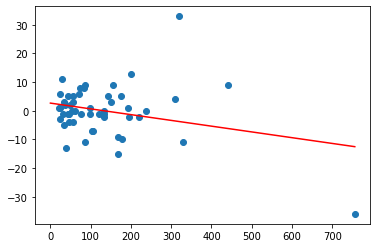

In [280]:
max_x = max(xs)
plt.scatter(xs, ys)
plt.plot([0, max_x], [b, max_x * m + b], "red")
plt.show()

In [188]:
m , b

(-0.005580743830114353, 0.03235838483798185)

In [318]:
blm_protests = get_csv("data/blm-protests.csv")

In [316]:
for protest in blm_protests:
    date_str = protest["date"]
    parts = date_str.split("/")
    month = parts[0]
    day = parts[1]
    year = parts[2]
    protest["year"] = "20" + year
    protest["month"] = month
    protest["day"] = day

In [317]:
save_csv(blm_protests, "data/blm-protests.csv")

In [286]:
def city_state_str(event):
    return "{}, {}".format(event["city"].replace(" ", "").lower(), event["state"])

In [287]:
blm_cities = set([city_state_str(protest) for protest in blm_protests])

In [298]:
killings_cities = set([city_state_str(killing) for killing in police_killings])

In [307]:
len(blm_cities)

241

In [311]:
city_killing_stats = {
    city : {
        "city" : city,
        "2013" : 0,
        "2014" : 0,
        "2015" : 0,
        "2016" : 0,
        "2017" : 0,
        "2018" : 0,
        "2019" : 0,
        "total" : 0
    } for city in killings_cities
}
for killing in police_killings:
    city = city_state_str(killing)
    city_killing_stats[city][killing["year"]] += 1
    city_killing_stats[city]["total"] += 1

In [320]:
def new_city_dict(city):
    return {
        "city" : city,
        "2014" : 0,
        "2015" : 0,
        "total" : 0
    }

In [321]:
city_protest_counts = {
    city : new_city_dict(city)
    for city in blm_cities
}

for protest in blm_protests:
    city = city_state_str(protest)
    if state in protest_counts:
        year = protest["year"]
        city_protest_counts[city][year] += 1
        city_protest_counts[city]["total"] += 1

In [427]:
def is_relevant(city_stat):
    years_with_killing = 0
    for key in city_stat.keys():
        if key not in ["city", "total"]:
            if city_stat[key] > 0:
                years_with_killing += 1
    return city_stat["total"] > 3

In [428]:
relevant_killing_city_counts = [city for city in city_killing_stats.values() if is_relevant(city)]

In [429]:
relevant_killing_cities = [city["city"] for city in relevant_killing_city_counts]

In [430]:
relevant_protest_city_counts = [new_city_dict(city) if city not in city_protest_counts else city_protest_counts[city] for city in relevant_killing_cities]

In [431]:
assert(len(relevant_protest_city_counts) == len(relevant_killing_city_counts))

In [432]:
for killing_count, protest_count in zip(relevant_killing_city_counts, relevant_protest_city_counts):
    assert(killing_count["city"] == protest_count["city"])

In [452]:
def get_ys(city):
    before = city["2013"] + city["2014"] + city["2015"]
    after = city["2017"] + city["2018"] + city["2019"]
    return 0 if after + before == 0 else (after - before) / city["total"]

In [453]:
xs = [city["total"] for city in relevant_protest_city_counts]
ys = [get_ys(city) for city in relevant_killing_city_counts]

In [454]:
reg = linregress(xs, ys)
reg

LinregressResult(slope=-0.012443436469470107, intercept=0.0451494019457734, rvalue=-0.1466819387304247, pvalue=0.005761091359121228, stderr=0.004479062165295612)

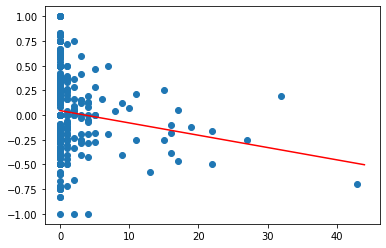

In [455]:
max_x = max(xs)
plt.scatter(xs, ys)
plt.plot([0, max_x + 1], [reg.intercept, reg.slope * (max_x + 1) + reg.intercept], "red")